In [1]:
import time
import os
import requests
import re, logging
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.proxy import Proxy, ProxyType
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.firefox.options import Options
from fake_useragent import UserAgent
from random import randint
import pandas as pd
import numpy as np

#pip install requests pandas openpyxl selenium=3.14 fake_useragent bs4
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.INFO)

## Test for www.moj.gov.sa

In [4]:
proxy = Proxy()
proxy.proxy_type = ProxyType.MANUAL
proxy.http_proxy = '133.18.239.64:8080'
proxy.ssl_proxy = '133.18.239.64:8080'
capabilities = webdriver.DesiredCapabilities.FIREFOX
proxy.add_to_capabilities(capabilities)

In [3]:
list_years = ['2021', '2021', '2022']
unique_years = sorted(set(list_years), key=int)
unique_years

['2021', '2022']

In [54]:
options = Options()
ua = UserAgent()
userAgent = ua.random
logging.info(userAgent)
options.add_argument(f'user-agent={userAgent}')
#opti#     driver = webdriver.Firefox()ons.add_argument("--headless")
driver = webdriver.Firefox(firefox_options=options)#, desired_capabilities=capabilities)



# body=WebDriverWait(driver,20).until(EC.visibility_of_element_located((By.TAG_NAME,'body')))
# r = body.get_attribute('innerHTML')
# soup = BeautifulSoup(r, "html.parser")

INFO:Mozilla/5.0 (Windows NT 6.2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/28.0.1467.0 Safari/537.36


In [53]:
url = 'https://www.ikea.com/fr/fr/'

In [58]:
body=WebDriverWait(driver,20).until(EC.visibility_of_element_located((By.TAG_NAME,'body')))
r = body.get_attribute('innerHTML')
soup = BeautifulSoup(r, "html.parser")

In [75]:
name = soup.find('span', {'class': 'pip-header-section__title--big notranslate'}).text.strip()
sku = soup.find('span', {'class': 'pip-product-identifier__value'}).text.strip()
price = soup.find('span', {'class': 'pip-price'}).text.strip()
main_category = soup.find('ol', {'class': 'bc-breadcrumb__list'}).find_all('li')[1].text.strip()
sub_category = soup.find('ol', {'class': 'bc-breadcrumb__list'}).find_all('li')[2].text.strip()
short_description = soup.find('p', {'class': 'pip-product-summary__description'}).text.strip()
large = soup.find('div', {'class': 'pip-product-dimensions__dimensions-container'}).find_all('p')[0].text.strip()
profondeur = soup.find('div', {'class': 'pip-product-dimensions__dimensions-container'}).find_all('p')[1].text.strip()
hauteur = soup.find('div', {'class': 'pip-product-dimensions__dimensions-container'}).find_all('p')[2].text.strip()

images


'https://www.ikea.com/fr/fr/images/products/gersby-bibliotheque-blanc__0251910_pe390723_s5.jpg?f=s'

In [55]:
driver.get(url)a

In [124]:
# Month BTN
driver.find_element_by_css_selector('#pps-tree-label-pps_f5fec0bcae774576863e91c571a948e3tree-view-control').click()


In [14]:
driver.get('https://www.moj.gov.sa/ar/opendata/bi/birealestate/Dashboards/100_kpiDistrict/101_Monthly/kpi101_04_G.aspx')

In [34]:
body=WebDriverWait(driver,20).until(EC.visibility_of_element_located((By.TAG_NAME,'body')))
r = body.get_attribute('innerHTML')
soup = BeautifulSoup(r, "html.parser")
tables = soup.find('table', {'class': 'ms-bigrid-table'}).find_all('tr')

In [35]:
# tables = soup.find('table').find_all('tr')
data = []
for table in tables:
    data.append({
    'real_estate_groups': table.find_all('td')[0].text.strip(),
    'chart_id': table.find_all('td')[1].text.strip(),
    'propreties_id': table.find_all('td')[2].text.strip(),
    'deal_date': table.find_all('td')[3].text.strip(),
    'deal_id': table.find_all('td')[4].text.strip(),
    'price': table.find_all('td')[5].text.replace('ر.س.', '').strip(),
    'area_m2': table.find_all('td')[6].text.strip(),
    'price_m2': table.find_all('td')[7].text.strip(),
    })


In [17]:
df = pd.read_excel('model.xlsx')

In [36]:
df1 = pd.DataFrame(data)
df = pd.concat([df, df1], ignore_index=True)
df.to_excel('final.xlsx')

In [29]:
options = Options()
ua = UserAgent()
userAgent = ua.random
logging.info(userAgent)
options.add_argument(f'user-agent={userAgent}')
#opti#     driver = webdriver.Firefox()ons.add_argument("--headless")
driver = webdriver.Firefox(firefox_options=options)

INFO:Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2227.0 Safari/537.36


In [ ]:
body=WebDriverWait(driver,20).until(EC.visibility_of_element_located((By.TAG_NAME,'body')))
r = body.get_attribute('innerHTML')
soup = BeautifulSoup(r, "html.parser")

In [37]:
import matplotlib.pyplot as plt
import numpy as np

In [43]:
df = pd.read_excel('final.xlsx')

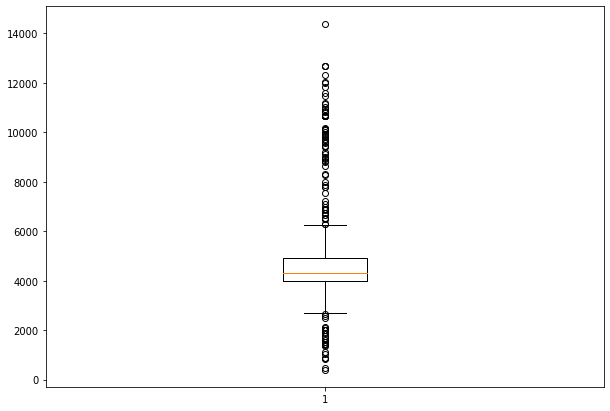

In [52]:
price = df['price_m2'].str.replace(',', '').str.replace('\u200f', '').astype(float)
arr = np.array(price)
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(arr)
 
# show plot
plt.show()